In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBRegressor

In [2]:
pip install -U scikit-learn


In [3]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df = df.drop("car_ID", axis=1)


In [5]:
df = pd.get_dummies(df, columns=["CarName"], drop_first=True)

In [6]:
df = df.fillna(df.median(numeric_only=True))

In [7]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       ...
       'CarName_volkswagen type 3', 'CarName_volvo 144ea',
       'CarName_volvo 145e (sw)', 'CarName_volvo 244dl', 'CarName_volvo 245',
       'CarName_volvo 246', 'CarName_volvo 264gl', 'CarName_volvo diesel',
       'CarName_vw dasher', 'CarName_vw rabbit'],
      dtype='object', length=170)

In [23]:
X = df.drop('price', axis=1)
Y = df['price']

# Identify all object type columns (which are likely categorical)
object_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to all identified object columns
X = pd.get_dummies(X, columns=object_cols, drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
rf_pred=rf.predict(X_test)


In [25]:
print("MAE:", mean_absolute_error(Y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, rf_pred)))
print("R²:", r2_score(Y_test, rf_pred))

MAE: 1397.1808048780488
RMSE: 1898.131745167382
R²: 0.9543612792727592


In [26]:
xg=XGBRegressor(n_estimators=200, random_state=42)
xg.fit(X_train, Y_train)
xg_pred=xg.predict(X_test)

In [27]:
rmse = np.sqrt(mean_squared_error(Y_test, xg_pred))  # racine de MSE
mae = mean_absolute_error(Y_test, xg_pred)
r2 = r2_score(Y_test, xg_pred)

print("Évaluation du modèle XGBoost :")
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

Évaluation du modèle XGBoost :
RMSE: 2299.3770219481307
MAE: 1583.5558309832318
R²: 0.9330267874609178


In [28]:
# 📌 Dictionnaire des modèles
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, random_state=42)
}

# 📌 Stocker les résultats
results = []

for name, model in models.items():
    # Entraînement
    model.fit(X_train, Y_train)
    # Prédictions
    y_pred = model.predict(X_test)
    # Évaluation
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred)) # Calculate RMSE manually
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    results.append([name, rmse, mae, r2])

# 📌 Mettre les résultats dans un tableau
results_df = pd.DataFrame(results, columns=["Modèle", "RMSE", "MAE", "R²"])
print(results_df)

          Modèle         RMSE          MAE        R²
0  Random Forest  1832.293426  1345.223976  0.957472
1        XGBoost  2299.377022  1583.555831  0.933027


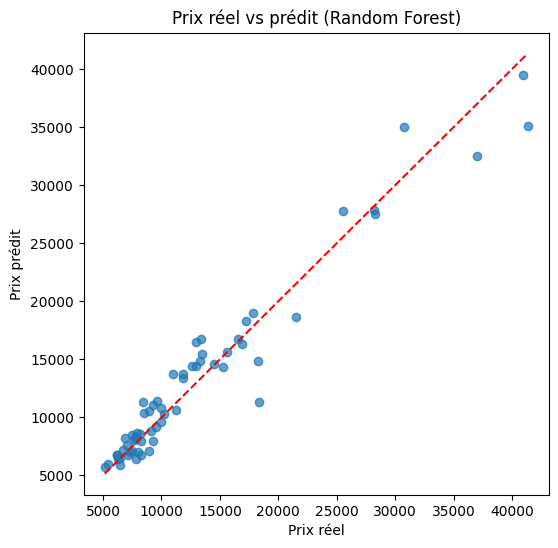

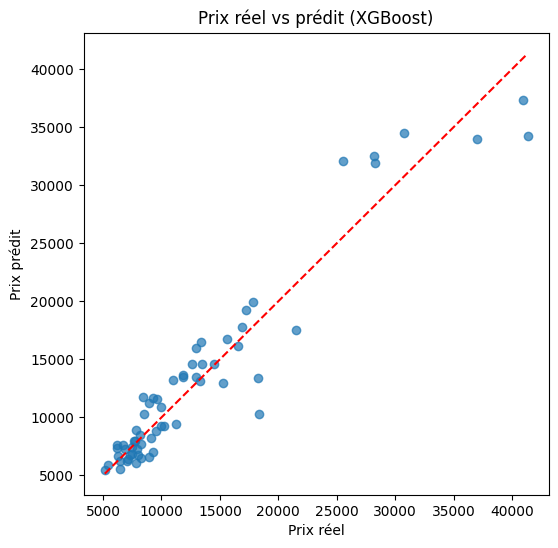

In [14]:
# Comparer pour chaque modèle
for name, model in models.items():
    # Prédiction
    y_pred = model.predict(X_test)

    # Scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(Y_test, y_pred, alpha=0.7)
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # ligne idéale
    plt.xlabel("Prix réel")
    plt.ylabel("Prix prédit")
    plt.title(f"Prix réel vs prédit ({name})")
    plt.show()


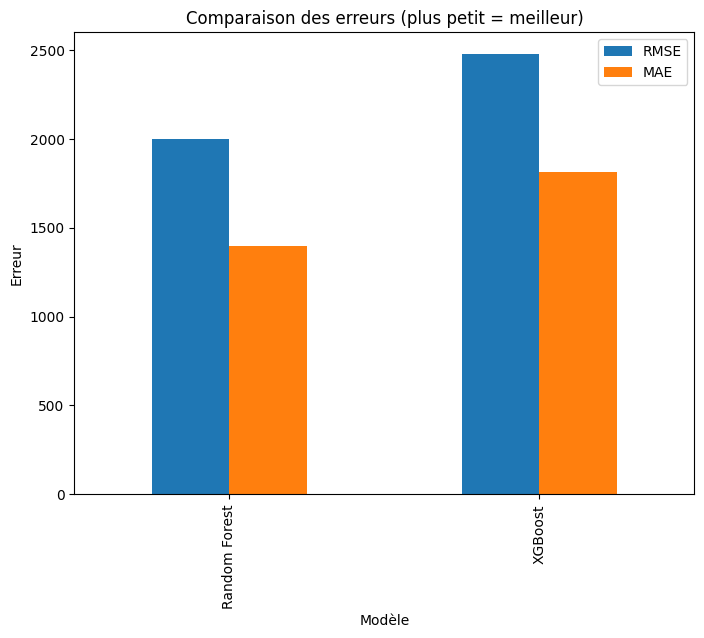

In [15]:
# Barplot des scores
results_df.set_index("Modèle")[["RMSE", "MAE"]].plot(kind="bar", figsize=(8,6))
plt.title("Comparaison des erreurs (plus petit = meilleur)")
plt.ylabel("Erreur")
plt.show()

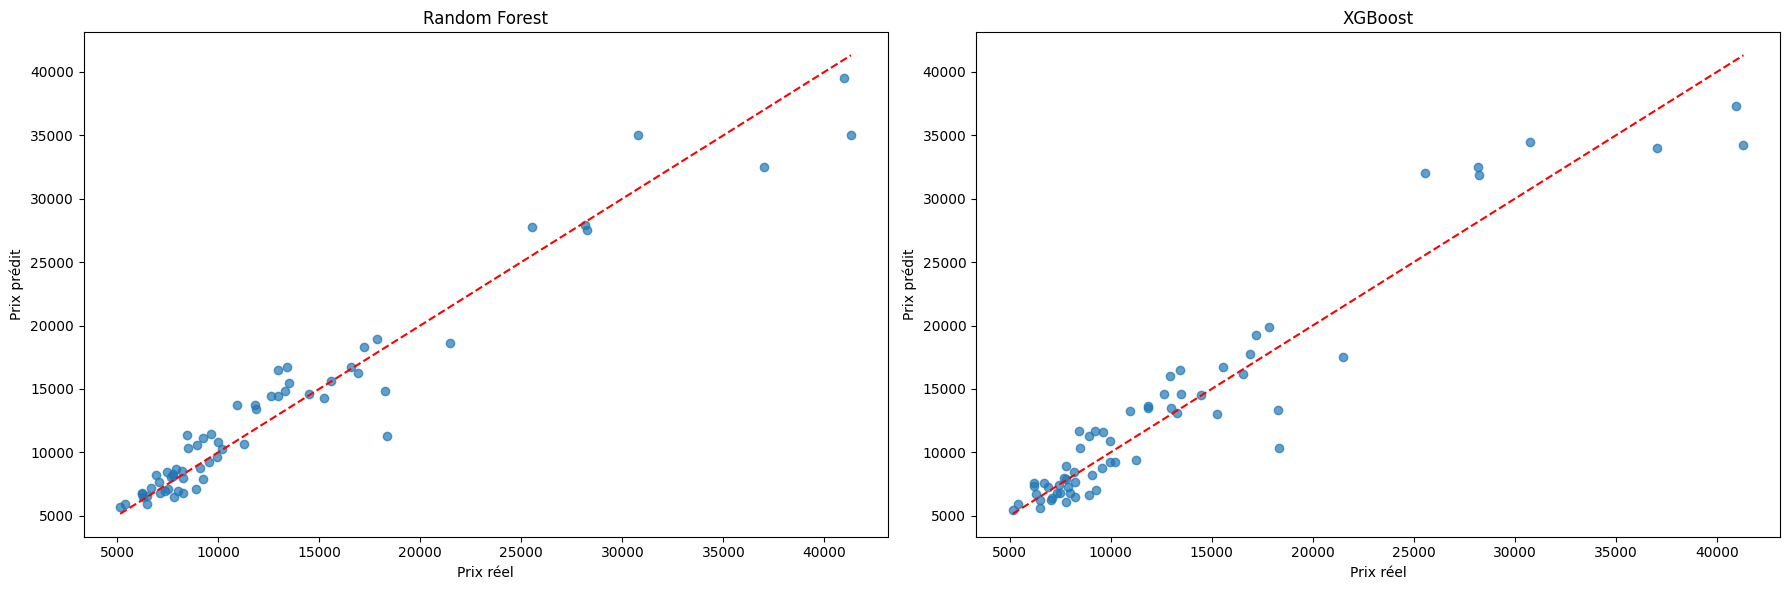

In [19]:


# Créer une figure avec 1 ligne et 2 colonnes (2 graphes côte à côte)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boucle sur les modèles + positions
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)

    # Scatter plot pour chaque modèle
    axes[i].scatter(Y_test, y_pred, alpha=0.7)
    axes[i].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
    axes[i].set_xlabel("Prix réel")
    axes[i].set_ylabel("Prix prédit")
    axes[i].set_title(f"{name}")

# Ajuster les espacements
plt.tight_layout()
plt.show()


In [20]:
# 3. Classification
# ======================
# Définir la classe (0 = pas chère, 1 = chère)
median_price = df["price"].median()
df["Target"] = (df["price"] > median_price).astype(int)

X_clf = df.drop(["price", "Target"], axis=1)
y_clf = df["Target"]

# Identify all object type columns in X_clf
object_cols_clf = X_clf.select_dtypes(include='object').columns

# Apply one-hot encoding to all identified object columns in X_clf
X_clf = pd.get_dummies(X_clf, columns=object_cols_clf, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train, y_train)
y_pred_clf = clf_model.predict(X_test)

print("\n----- CLASSIFICATION -----")
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf))


----- CLASSIFICATION -----
Accuracy: 0.9354838709677419
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        35
           1       0.87      1.00      0.93        27

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62



/tmp/ipython-input-1773583208.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Target"] = (df["price"] > median_price).astype(int)


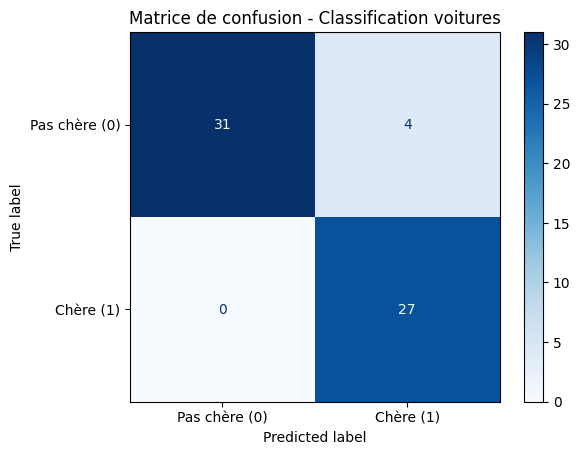

In [21]:


# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_clf)

# Affichage graphique
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pas chère (0)", "Chère (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Classification voitures")
plt.show()


In [22]:


# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_clf))

# Précision, rappel et F1-score
print("Précision:", precision_score(y_test, y_pred_clf))
print("Rappel:", recall_score(y_test, y_pred_clf))
print("F1-score:", f1_score(y_test, y_pred_clf))

# Rapport complet (toutes les classes 0 et 1)
print("\nRapport complet :")
print(classification_report(y_test, y_pred_clf))


Accuracy: 0.9354838709677419
Précision: 0.8709677419354839
Rappel: 1.0
F1-score: 0.9310344827586207

Rapport complet :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        35
           1       0.87      1.00      0.93        27

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62

